<a href="https://colab.research.google.com/github/Harshpatel44/ML-A4/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`#author: Harsh Patel`

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as Func 

In [0]:
iris = datasets.load_iris()

Displaying The IRIS Dataset

In [6]:
# converting the dataset to a numpy array
data_iris = np.array(iris.data)
output = np.array(iris.target)
print(pd.DataFrame(data=data_iris,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']))

     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Standardising the data

In [7]:
data_iris = StandardScaler().fit_transform(data_iris)
print(pd.DataFrame(data=data_iris,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']))

     Sepal Length  Sepal Width  Petal Length  Petal Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


Using PCA to reduce features

In [8]:
pca = decomposition.PCA(n_components=4)
pca_iris=pca.fit_transform(data_iris)
print(pd.DataFrame(data=pca_iris,columns=['PC1','PC2','PC3','PC4']))

          PC1       PC2       PC3       PC4
0   -2.264703  0.480027 -0.127706 -0.024168
1   -2.080961 -0.674134 -0.234609 -0.103007
2   -2.364229 -0.341908  0.044201 -0.028377
3   -2.299384 -0.597395  0.091290  0.065956
4   -2.389842  0.646835  0.015738  0.035923
..        ...       ...       ...       ...
145  1.870503  0.386966  0.256274 -0.389257
146  1.564580 -0.896687 -0.026371 -0.220192
147  1.521170  0.269069  0.180178 -0.119171
148  1.372788  1.011254  0.933395 -0.026129
149  0.960656 -0.024332  0.528249  0.163078

[150 rows x 4 columns]


Visualizing for first two PCA

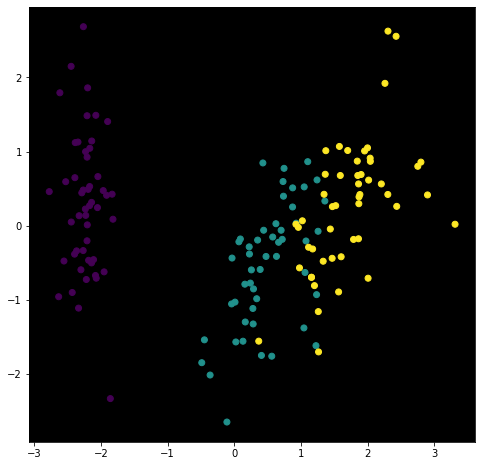

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(pca_iris[:,0],pca_iris[:,1],c=output)
ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.show()

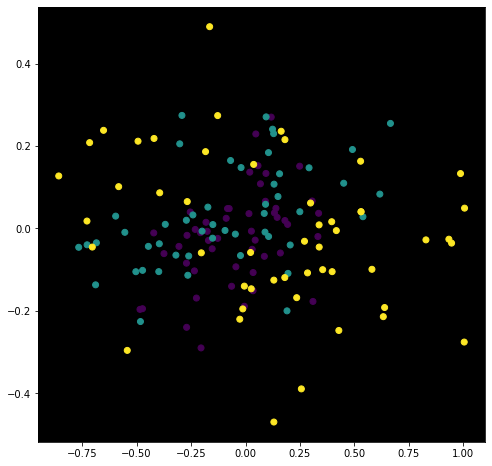

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(pca_iris[:,2],pca_iris[:,3],c=output)
ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.show()

In [11]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


**b) PCA FOR FEATURE SELECTION**

Loading MNIST data

In [0]:
mnist = datasets.fetch_openml('mnist_784')

Splitting the training and testing data

In [0]:
train = mnist.data[:60000,:]
test =  mnist.data[60000:,:]
y_train = mnist.target[:60000]
y_test =  mnist.target[60000:]
#y_train=np.resize(y_train,(y_train.shape[0],1))
#y_test=np.resize(y_test,(y_test.shape[0],1))

Applying PCA and finding features

Simple Neural Network to test different variances of PCA

In [0]:
def Model(pca_train,pca_test,y_train,y_test,epochs=2,batch_size=100,filter_size=3,pool_size=2):
  loss_list=[]
  class net(nn.Module):  
    def __init__(self):
      super(net,self).__init__()
      self.fc1 = nn.Linear(pca_train.shape[1],50)
      self.fc2 = nn.Linear(50,10)
    def forward(self,x):
      x=Func.relu(self.fc1(x))
      x=Func.log_softmax(self.fc2(x),dim=1)
      return x
  Net = net()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(Net.parameters(), lr = 0.001,momentum = 0.9)

  for e in range(epochs):
    optimizer.zero_grad()
    output = Net(pca_train)
    loss = criterion(output,y_train)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

  #Evaluating on training data
  correct = 0
  total = 0
  with torch.no_grad():
      outputs = Net(pca_train)
      _, predicted = torch.max(outputs.data, 1)
      total += y_train.shape[0]
      correct += (predicted == y_train).sum().item()
  train_acc = correct / total
  #Evaluating on test data
  correct = 0
  total = 0
  with torch.no_grad():
      outputs = Net(pca_test)
      _, predicted = torch.max(outputs.data, 1)
      total += y_test.shape[0]
      correct += (predicted == y_test).sum().item()
  test_acc = correct / total

  return loss_list, train_acc, test_acc

1. Standard Scaling the data, Feature selection using PCA, and classifying images from PCA features.<br>
2. Using different variances to select features and observing the accuracy of classification.

In [6]:
for i in [.50,.75,.90,.95]:
  #scaling
  scalar = StandardScaler()
  scalar.fit(train)
  train=scalar.transform(train)
  test=scalar.transform(test)
  #pca
  pca_mnist=decomposition.PCA(i)
  pca_mnist.fit(train)
  pca_train = pca_mnist.transform(train)
  pca_test = pca_mnist.transform(test)
  #changing dtype
  pca_train=np.array(pca_train,dtype="float32")
  pca_test=np.array(pca_test,dtype="float32")
  y_train=np.array(y_train,dtype="long")
  y_test=np.array(y_test,dtype="long")
  #converting to tensors 
  pca_train=torch.from_numpy(pca_train)
  pca_test =torch.from_numpy(pca_test)
  y_train = torch.from_numpy(y_train)
  y_test = torch.from_numpy(y_test)
  losses,train_acc,test_acc = Model(pca_train,pca_test,y_train,y_test,200,100,3,2) #epochs,batch_size,filter_size,pool_size
  print("Variance:",i," || training acc:",train_acc," || testing acc:",test_acc)

Variance: 0.5  || training acc: 0.7712666666666667  || testing acc: 0.7786
Variance: 0.75  || training acc: 0.7473833333333333  || testing acc: 0.7564
Variance: 0.9  || training acc: 0.7712166666666667  || testing acc: 0.7845
Variance: 0.95  || training acc: 0.7711666666666667  || testing acc: 0.7825


Reconstructing the image 

In [357]:
pca_train=pca_mnist.inverse_transform(pca_train)
pca_test=pca_mnist.inverse_transform(pca_test)
print(pca_train.shape)
print(pca_test.shape)

torch.Size([10000, 331])
(10000, 784)


In [0]:
def cnn_Model(pca_train,pca_test,y_train,y_test,epochs=2,batch_size=100,filter_size=3,pool_size=2):
  ip_channel=1
  op_channel= 6
  conv_strides=1
  pool_strides=1
  loss_list=[]

  op_conv1 = (( pca_train.shape[2] - filter_size) / conv_strides) +1
  max_pool1 = (( op_conv1 - pool_size)/pool_strides) + 1
  # print(op_conv1)
  # print(max_pool1)
  # print(op_channel*max_pool1*max_pool1)
  
  
  train_loader = torch.utils.data.DataLoader(pca_train, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(pca_test, batch_size=batch_size, shuffle=False)
  
  class net(nn.Module):  
    def __init__(self):
      super(net,self).__init__()
      self.conv1 = nn.Conv2d(ip_channel,op_channel,filter_size)
      self.pool = nn.MaxPool2d(pool_size,pool_strides)
      self.fc1 = nn.Linear(int(op_channel*max_pool1*max_pool1),50)
      self.fc2 = nn.Linear(50,10)
    def forward(self,x):
      x = self.pool(Func.relu(self.conv1(x)))
      print(x.shape)
      x=x.view(-1,int(op_channel*max_pool1*max_pool1))
      x=Func.relu(self.fc1(x))
      x=Func.log_softmax(self.fc2(x),dim=1)
      return x
  Net = net()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(Net.parameters(), lr = 0.001,momentum = 0.9)

  for e in range(epochs):
    print('epochs:',e)
    optimizer.zero_grad()
    outputs = Net(pca_train)
    loss = criterion(outputs,y_train)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

##### Evaluating the network on training data ################################
  print("Evaluating on training data ...")
  correct = 0
  total = 0
  with torch.no_grad():
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  train_acc = correct / total

  ##### Evaluating the network on test data ####################################
  print("Evaluating on test data ...")
  correct = 0
  total = 0
  with torch.no_grad():      
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  test_acc = correct / total

  return losses, train_acc, test_acc

In [0]:

pca_train=np.array(pca_train,dtype="float32")
pca_test=np.array(pca_test,dtype="float32")
y_train=np.array(y_train,dtype="long")
y_test=np.array(y_test,dtype="long")
#converting to tensors 
pca_train=torch.from_numpy(pca_train)
pca_test =torch.from_numpy(pca_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)
pca_train=pca_train.reshape(pca_train.shape[0],1,28,28)
pca_test=pca_test.reshape(pca_test.shape[0],1,28,28)
losses,train_acc,test_acc = cnn_Model(pca_train,pca_test,y_train,y_test,200,100,4,2) #epochs,batch_size,filter_size,pool_size
print("Variance:",i," || training acc:",train_acc," || testing acc:",test_acc)

epochs: 0
